# Gerekli Kütüphaneler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import QuantileRegressor as SKQuantileRegressor
from sklearn import datasets

seed = 42
np.random.seed(seed)

# Veri Seti

In [2]:
X, y = datasets.make_regression(
    n_samples=200,
    n_features=1,
    noise=15,
    random_state=seed
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

# Quantile Regression

In [4]:
class QuantileRegressor:
    def __init__(self, quantile=0.5, lr=0.01, n_iters=1000):
        # Quntile degeri (0.5 medyan)
        self.quantile = quantile
        # Ogrenme orani
        self.lr = lr
        # Iterasyon sayisi
        self.n_iters = n_iters
        # Agirlik
        self.W = None
        # Bias
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Agirliklar ve bias baslatilir.
        self.W = np.zeros(n_features)
        self.b = 0

        # Gradyan inisi
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.W) + self.b
            errors = y - y_pred

            # Gradyanlar hesaplanir, quantile loss turevi alınır.
            dW = -np.dot(X.T, np.where(errors > 0, self.quantile, self.quantile - 1)) / n_samples
            db = -np.sum(np.where(errors > 0, self.quantile, self.quantile - 1)) / n_samples

            # Agirlik ve bias guncellenir
            self.W -= self.lr * dW
            self.b -= self.lr * db

            # quantile loss (pinball loss)
            loss = np.where(errors > 0, self.quantile * errors, (self.quantile - 1) * errors)
            loss = np.mean(loss)

    def predict(self, X):
        return np.dot(X, self.W) + self.b

# Eğitim

In [5]:
qr = QuantileRegressor()
qr.fit(X_train, y_train)

# Tahmin

In [6]:
y_pred = qr.predict(X_test)

In [7]:
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: -0.06501321992013032


In [8]:
print("MSE Score:", mean_squared_error(y_test, y_pred))

MSE Score: 6564.4574759971365


# Sonuçlar

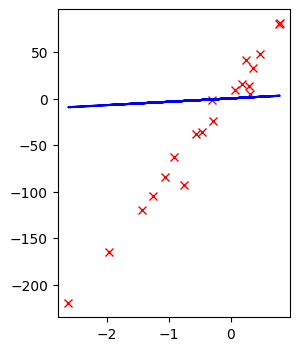

In [9]:
plt.figure(figsize=(3, 4))
plt.plot(X_test, y_test, "rx")
plt.plot(X_test, y_pred, "b")
plt.show()

# Scikit-Learn

In [10]:
qr2 = SKQuantileRegressor()
qr2.fit(X_train, y_train)

QuantileRegressor()

In [11]:
y_pred_2 = qr2.predict(X_test)

In [13]:
print("R^2 Score:", r2_score(y_test, y_pred_2))

R^2 Score: -0.1994506392168347


In [14]:
print("MSE Score:", mean_squared_error(y_test, y_pred_2))

MSE Score: 7393.093877545463
